# Bogger Cycle Overview

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bogger_cycle = pd.read_csv("../../Orb/BoggerCycle_LD118.csv")

## Column overview

In [54]:
list(zip(bogger_cycle.columns, [type(x) for x in bogger_cycle.ix[0,:]]))

[('Unnamed: 0', numpy.int64),
 ('EquipmentName', str),
 ('TippleName', str),
 ('DrawPoint', str),
 ('StartDateTime', str),
 ('EndDateTime', str),
 ('Tonnage', numpy.float64),
 ('StartLoadedDateTime', str),
 ('AuGrade', numpy.float64),
 ('EmptyMetres', numpy.float64),
 ('LoadedMetres', numpy.float64),
 ('Operator', str),
 ('OrderID', numpy.float64),
 ('DataSource', str),
 ('TonnesType', str),
 ('_CreatedInOrbBy', str),
 ('_CreatedInOrbAt', str),
 ('_LastUpdatedInOrbBy', str),
 ('_LastUpdatedInOrbAt', str),
 ('_UpdatedInOneViewAt', str)]

In [58]:
bogger_cycle.head(3)

,Unnamed: 0,EquipmentName,TippleName,DrawPoint,StartDateTime,EndDateTime,Tonnage,StartLoadedDateTime,AuGrade,EmptyMetres,LoadedMetres,Operator,OrderID,DataSource,TonnesType,_CreatedInOrbBy,_CreatedInOrbAt,_LastUpdatedInOrbBy,_LastUpdatedInOrbAt,_UpdatedInOneViewAt
0,1,LD118,DP103,112E05,2016-11-11 01:22:40,2016-11-11 01:25:48,16.95,2016-11-11 01:22:40,NaN,NaN,NaN,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,NaN,MPM,Ordered,Orb,2016-11-11 01:26:01,Orb,2016-11-11 01:26:09,2016-11-11 01:26:40
1,2,LD118,DP103,112E05,2016-11-11 01:25:48,2016-11-11 01:28:29,16.30,2016-11-11 01:27:40,NaN,NaN,NaN,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,NaN,MPM,Ordered,Orb,2016-11-11 01:29:01,Orb,2016-11-11 01:29:03,2016-11-11 01:29:40
2,3,LD118,DP103,112E05,2016-11-11 01:28:29,2016-11-11 01:35:55,14.00,2016-11-11 01:34:46,NaN,NaN,NaN,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,NaN,MPM,Ordered,Orb,2016-11-11 01:36:07,Orb,2016-11-11 01:36:10,2016-11-11 01:36:40


In [116]:
col_analysis = pd.DataFrame
# for col in bogger_cycle.columns:
    # overview value counts for each column
    # TODO change to adding to a row format thing
#     col_analysis = col_analysis.merge(bogger_cycle[col].value_counts().head(3))
print(col_analysis)


<class 'pandas.core.frame.DataFrame'>


## Column clean up

* rename **Unnamed: 0** to index
* **EquipmentName** is always the same bogger LD118
* **TippleName** + **DrawPoint** is a comparable **Journey**
* **TimeTaken** is the delta between the timestamp **StartDateTime** and **EndDateTime**
* **Tonnage** is key but the *350* value seems to be some kind of error?
* blank fields ignored: **AuGrade**, **EmptyMetres**, **LoadedMetres**
* **Operator** is important for comparing operator
* make no sense of **DataSource**: MPM, ORB SAOC, MANUAL - would need to ask mentor?
* make no sense of **TonnesType**: Ordered, Safety, Prep - would need to ask mentor?
* see no use for **_CreatedInOrbBy** & **_LastUpdatedInOrbBy**: Orb, Manual
* see no need for times: **StartLoadedDateTime**, **_LastUpdatedInOrbAt**, **_UpdatedInOneViewAt**

In [117]:
clean_bogger_cycle = bogger_cycle.filter([
    'Unamed: 0',
    'TippleName',
    'DrawPoint',
    'StartDateTime',
    'EndDateTime',
    'Tonnage',
    'Operator'], axis=1)

# parse dates
for time_field in ['StartDateTime', 'EndDateTime']:
    clean_bogger_cycle[time_field] = clean_bogger_cycle[time_field].apply(lambda x:pd.to_datetime(x))

# create Journey field
clean_bogger_cycle['Journey'] = clean_bogger_cycle['TippleName'] + clean_bogger_cycle['DrawPoint']

# create time delta field
clean_bogger_cycle['TimeTaken'] = clean_bogger_cycle['EndDateTime'] - clean_bogger_cycle['StartDateTime']
clean_bogger_cycle['TimeTakenSec'] = clean_bogger_cycle['TimeTaken'].apply(lambda x: x/np.timedelta64(1, 's'))

# remove high Tonnage runs?
# clean_bogger_cycle = clean_bogger_cycle.query('0 < Tonnage < 50')
clean_bogger_cycle = clean_bogger_cycle[(clean_bogger_cycle['Tonnage'] >= 0) & (clean_bogger_cycle['Tonnage'] <= 50)]

clean_bogger_cycle.head(3)

,TippleName,DrawPoint,StartDateTime,EndDateTime,Tonnage,Operator,Journey,TimeTaken,TimeTakenSec
0,DP103,112E05,2016-11-11 01:22:40,2016-11-11 01:25:48,16.95,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,DP103112E05,00:03:08,188
1,DP103,112E05,2016-11-11 01:25:48,2016-11-11 01:28:29,16.30,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,DP103112E05,00:02:41,161
2,DP103,112E05,2016-11-11 01:28:29,2016-11-11 01:35:55,14.00,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,DP103112E05,00:07:26,446


In [146]:
list(zip(clean_bogger_cycle.columns, [type(x) for x in clean_bogger_cycle.ix[0,:]]))

[('TippleName', str),
 ('DrawPoint', str),
 ('StartDateTime', pandas.tslib.Timestamp),
 ('EndDateTime', pandas.tslib.Timestamp),
 ('Tonnage', numpy.float64),
 ('Operator', str),
 ('Journey', str),
 ('TimeTaken', pandas.tslib.Timedelta),
 ('TimeTakenSec', numpy.float64)]

## Tonnage and time
Look at the spread of tonnage and time taken. Also remove some extreme values. Is there a std_dev way of removing these values automaticall?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123a00dd8>]], dtype=object)

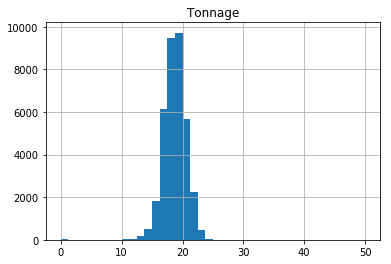

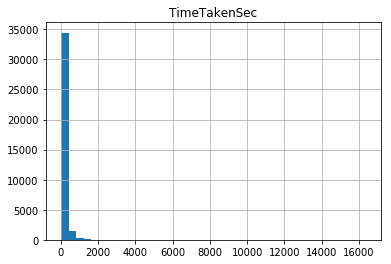

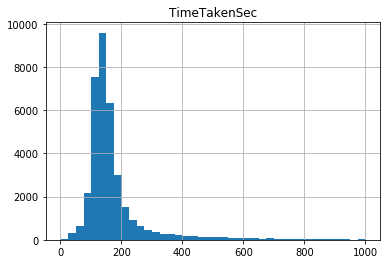

In [118]:
clean_bogger_cycle[['Tonnage']].hist(bins=40)
clean_bogger_cycle[['TimeTakenSec']].hist(bins=40)
clean_bogger_cycle[
    (clean_bogger_cycle['TimeTakenSec'] > 0) & (clean_bogger_cycle['TimeTakenSec'] <= 1000)
][['TimeTakenSec']].hist(bins=40)

### Tonnage TimeTakenSec correlation?

,Tonnage,TimeTakenSec
Tonnage,1.000000,-0.000581
TimeTakenSec,-0.000581,1.000000


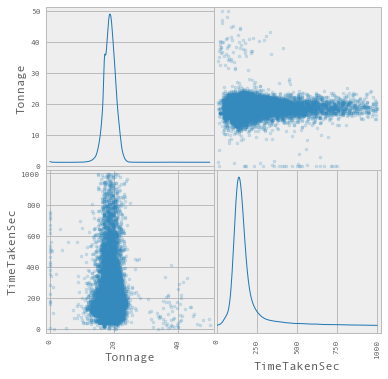

In [134]:
from pandas.tools.plotting import scatter_matrix

bc_ltd = clean_bogger_cycle[(clean_bogger_cycle['TimeTakenSec'] > 0) & (clean_bogger_cycle['TimeTakenSec'] <= 1000)]
scatter_matrix(bc_ltd[['Tonnage', 'TimeTakenSec']], alpha=0.2, figsize=(6, 6), diagonal='kde')

bc_ltd.corr()

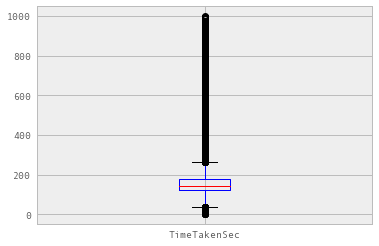

In [132]:
bc_ltd[['TimeTakenSec']].boxplot(return_type='axes')

## Journeys
What do the most common journeys look like?

Journey
DP103112W04    [[Axes(0.125,0.125;0.336957x0.755), Axes(0.563...
DP103112W07    [[Axes(0.125,0.125;0.336957x0.755), Axes(0.563...
DP103112W08    [[Axes(0.125,0.125;0.336957x0.755), Axes(0.563...
DP103112W10    [[Axes(0.125,0.125;0.336957x0.755), Axes(0.563...
DP103112W11    [[Axes(0.125,0.125;0.336957x0.755), Axes(0.563...
dtype: object

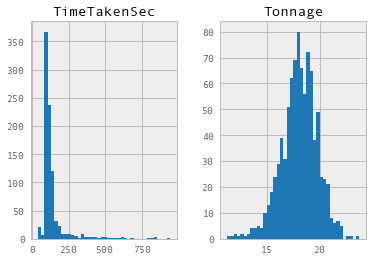

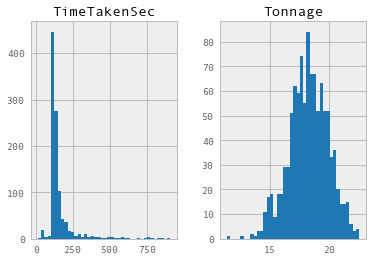

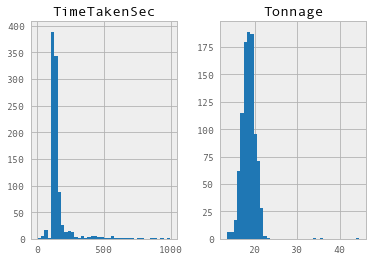

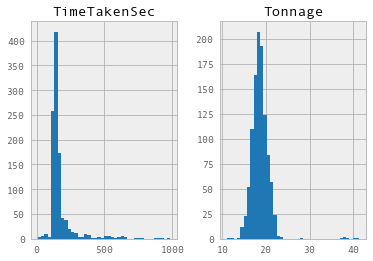

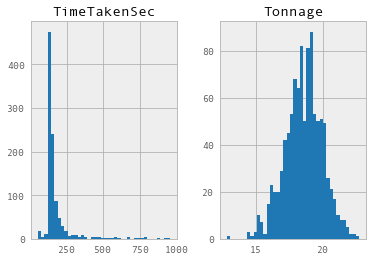

In [145]:
x = 5
top_x_journeys = bc_ltd['Journey'].value_counts().head(5).index
bc_ltd[bc_ltd['Journey'].isin(top_x_journeys)].groupby('Journey').hist(bins=40)

## TODO

* identify shifts
* trips per shift
* tons per shift
* variance of shift per operator
* overlay some kind of histograms

      clean_bogger_cycle.groupby('Operator').Tonnage.hist(alpha=0.4)
      bogger_cycle.groupby('Operator')[['Tonnage']].hist(alpha=0.4)
      bogger_cycle.hist()

* time series of work time
* time series of no work time
* is there a pattern?
* how it aligns with shift?

In [22]:
bogger_cycle['Tonnage'].diff().head(20)
bogger_cycle['OperatorShift'] = bogger_cycle['Operator'] == bogger_cycle['Operator'].shift(1).fillna(bogger_cycle['Operator'])
bogger_cycle['OperatorShift'].diff().head(200)

0        NaN
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
Name: OperatorShift, dtype: object